In [1]:
"""
借鉴于
https://github.com/MorvanZhou/Evolutionary-Algorithm/blob/master/tutorial-contents/Evolution%20Strategy/Evolution%20Strategy%20Basic.py

"""
import numpy as np
import matplotlib.pyplot as plt
DNA_SIZE = 1             # DNA (real number) 即要求的x = argmax(F)
DNA_BOUND = [0, 5]       # solution upper and lower bounds
N_GENERATIONS = 200
POP_SIZE = 100           # population size
N_KID = 50               # n kids per generation

In [3]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [4]:
import tensorflow as tf
a = tf.constant([1.,2.,3.,4.,5.,6.], shape=[2,3], name='a')
b = tf.constant([1.,2.,3.,4.,5.,6.], shape=[3,2], name='b')
c = tf.matmul(a,b)

with tf.Session(config= tf.ConfigProto(log_device_placement=True)) as sess:
    print(sess.run(c))

[[ 22.  28.]
 [ 49.  64.]]


In [2]:
def cal_fitness(x):
    return np.sin(10*x)*x + np.cos(2*x)*x

In [3]:
# np.random.rand(返回的是0-1的)
# np.random.randn(返回标准正态分布中的数值)
# np.random.random(返回0-1的小数，作用于rand相似，前者参数可以不用tuple表示)
pop = dict(DNA = 5 * np.random.rand(1, DNA_SIZE).repeat(POP_SIZE, axis=0),
           mut_strength = np.random.rand(POP_SIZE, DNA_SIZE))

In [4]:
def make_kid(pop, n_kid):
    kids = {"DNA":np.empty((n_kid, DNA_SIZE))}
    kids["mut_strength"] = np.empty_like(kids["DNA"])
    for kv, ks in zip(kids["DNA"], kids["mut_strength"]):
        p1, p2 = np.random.choice(np.arange(POP_SIZE), size = 2, replace = False) # 获取父母1，2
        cp = np.random.randint(0, 2, DNA_SIZE, dtype=np.bool) # 是否取p1 or p2
        kv[cp] = pop["DNA"][p1, cp] # (第p1个，是否取)
        kv[~cp] = pop["DNA"][p2, ~cp] # (不取p1，就取p2)

        ks[cp] = pop['mut_strength'][p1, cp]
        ks[~cp] = pop['mut_strength'][p2, ~cp]    
        
        #变异
        
        # *ks.shape表示把ks.shape这里的tuple里的每一个元素都传入函数
        ks[:] = np.maximum(ks + (np.random.rand(*ks.shape)-0.5), 0.) # 稳定的变异，且保持在不小于0
        # 将变异强度变异以后, 他就能在快收敛的时候很自觉的逐渐减小变异强度, 方便收敛.
        kv += ks * np.random.randn(*kv.shape)
        # np.clip(a, a_min, a_max, out = None)把大于a_max和小于a_min的全部用a_max/a_min取代
        kv[:] = np.clip(kv, *DNA_BOUND) 
        
    return kids

In [5]:
def kill_bad(pop, kids):
    # 组合在一起
    for key in ["DNA", "mut_strength"]:
        pop[key] = np.vstack((pop[key], kids[key])) # np.vstack(tuple) 将两个组合在一起

    fitness = (cal_fitness(pop["DNA"])).flatten() # 变为一阶
    idx = np.arange(pop["DNA"].shape[0])
    # x.argsort() 将x中的元素从小到大排序，提取其index
    good_idx = idx[fitness.argsort()][-POP_SIZE:] # 取最大的POP_SIZE个
    for key in ["DNA", "mut_strength"]:
        pop[key] = pop[key][good_idx]
        
    return pop

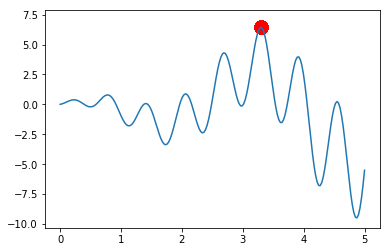

In [8]:
# numpy.linspace(start, stop, num=50, endpoint=True, 
#                retstep=False, dtype=None)[source]
# 返回一个num数量元素的list, 从start 到 

plt.ion() # 打开交互模式
X = np.linspace(*DNA_BOUND, 200)
plt.plot(X, cal_fitness(X))

for i in range(N_GENERATIONS):
    if 'sca' in globals(): sca.remove()    
    sca = plt.scatter(pop["DNA"],cal_fitness(pop["DNA"]),
                          s=200, lw=0, c="red", alpha=0.5)
    plt.pause(0.05)
        
    kids = make_kid(pop, N_KID)
    pop = kill_bad(pop, kids)
    # print(np.max(cal_fitness(pop["DNA"].flatten())))
plt.ioff()
plt.show()
# plt.show()